In [16]:
import netCDF4
import gzip
import xarray as xr
import datetime as dt
import numpy as np
from config.ncconfig import slice_config, ncconfig


# open pet file
pet = xr.open_dataset('cru_ts4.06.1901.2021.pet.dat.nc')
pet = pet.sel(time=slice_config.slice1)
# set time

months = pet.time.values.astype("datetime64[M]")
# make ndarray 
# shape is (time, lat, lon)
arr = np.zeros((len(months), pet.lat.shape[0], pet.lon.shape[0]))
for i, (time, pet) in enumerate(zip(months, pet.pet.values)):
    arr2 = np.array([1 if x < 5 else 0 for x in pet.flatten()])
    arr[i] = arr2.reshape(pet.shape[0], pet.shape[1])
    # filter arr with nan values
    arr[i] = np.where(np.isnan(pet), np.nan, arr[i])


    

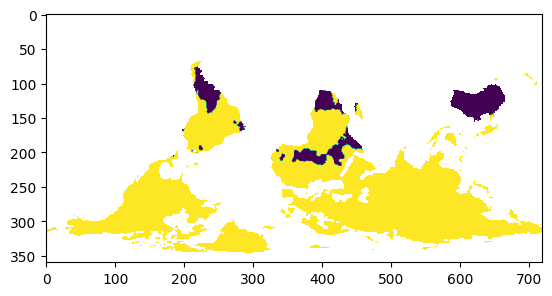

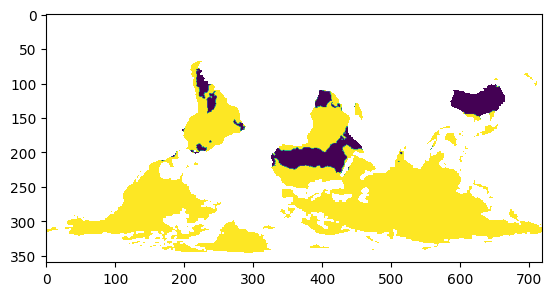

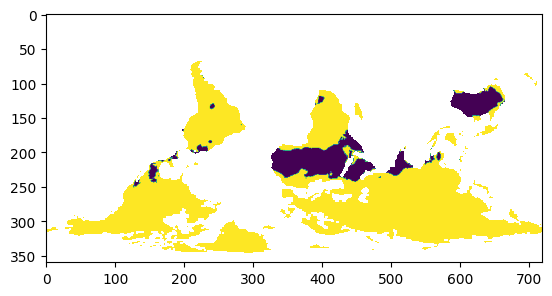

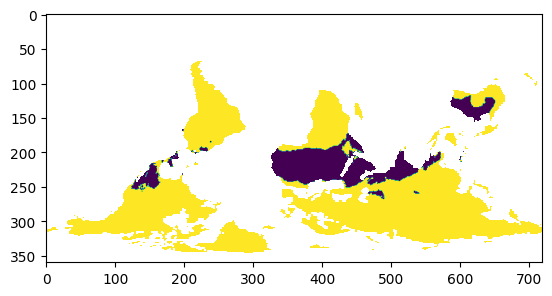

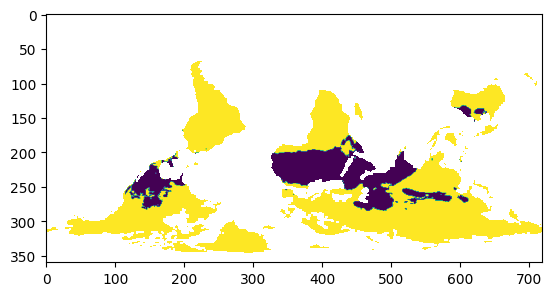

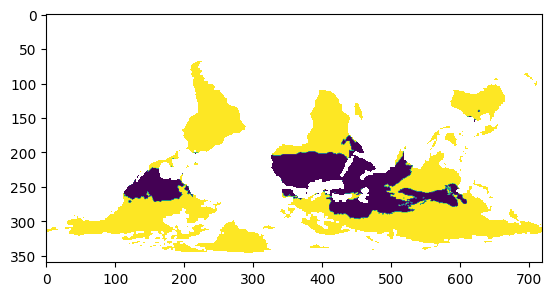

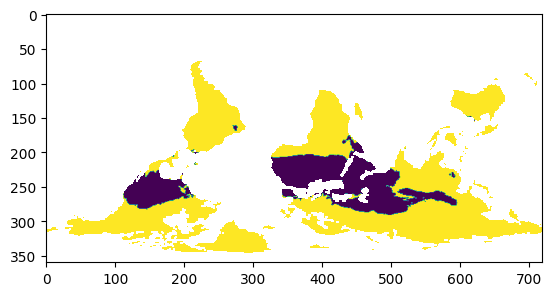

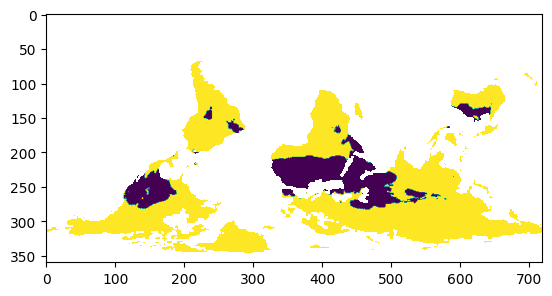

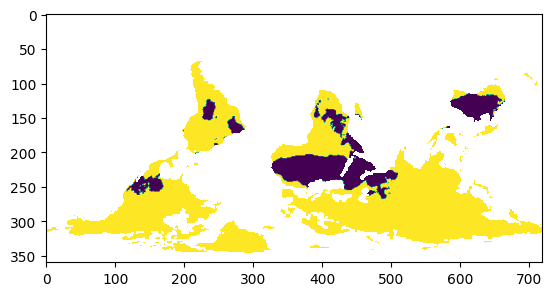

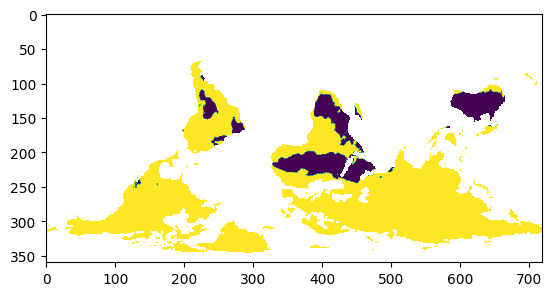

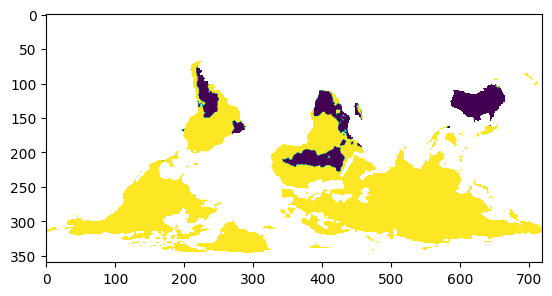

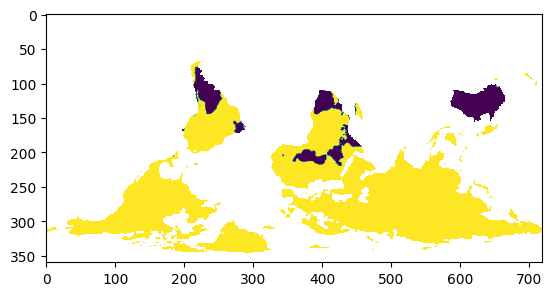

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("test.csv")
for i in range(1,13):
    plt.imshow(df.iloc[:,i+1].values.reshape(360,720))
    plt.show()
    plt.close()


In [5]:
from config.ncconfig import ncconfig, slice_config
import xarray as xr
pet = xr.open_dataset('cru_ts4.06.1901.2021.pet.dat.nc').sel(time=slice_config.slice1)
months = pet.time.values.astype("datetime64[M]")
arr = np.zeros((len(months), pet.lat.shape[0], pet.lon.shape[0]))
for i, pet in enumerate(pet.pet.values):
    arr2 = np.array([1 if ((x < 7) & (x > 5)) else 0 for x in pet.flatten()])
    arr[i] = arr2.reshape(pet.shape[0], pet.shape[1])
    # filter arr with nan values
    arr[i] = np.where(np.isnan(pet), np.nan, arr[i])
arr

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [7]:
arr.shape

(396, 360, 720)

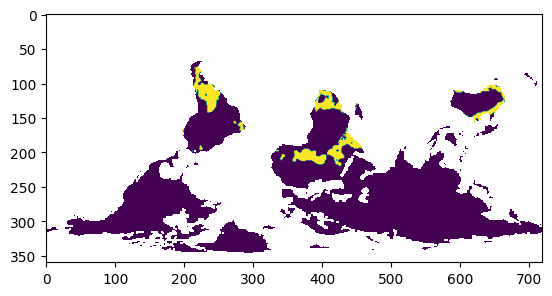

In [6]:
plt.imshow(arr[0])

In [36]:
dc = {j:arr[i,:,:].flatten() for i,j in enumerate(months)}
dc

{numpy.datetime64('1901-01'): array([0., 0., 0., ..., 0., 0., 0.]),
 numpy.datetime64('1901-02'): array([0., 0., 0., ..., 0., 0., 0.]),
 numpy.datetime64('1901-03'): array([0., 0., 0., ..., 0., 0., 0.]),
 numpy.datetime64('1901-04'): array([0., 0., 0., ..., 0., 0., 0.]),
 numpy.datetime64('1901-05'): array([0., 0., 0., ..., 0., 0., 0.]),
 numpy.datetime64('1901-06'): array([0., 0., 0., ..., 0., 0., 0.]),
 numpy.datetime64('1901-07'): array([0., 0., 0., ..., 0., 0., 0.]),
 numpy.datetime64('1901-08'): array([0., 0., 0., ..., 0., 0., 0.]),
 numpy.datetime64('1901-09'): array([0., 0., 0., ..., 0., 0., 0.]),
 numpy.datetime64('1901-10'): array([0., 0., 0., ..., 0., 0., 0.]),
 numpy.datetime64('1901-11'): array([0., 0., 0., ..., 0., 0., 0.]),
 numpy.datetime64('1901-12'): array([0., 0., 0., ..., 0., 0., 0.]),
 numpy.datetime64('1902-01'): array([0., 0., 0., ..., 0., 0., 0.]),
 numpy.datetime64('1902-02'): array([0., 0., 0., ..., 0., 0., 0.]),
 numpy.datetime64('1902-03'): array([0., 0., 0.,

In [ ]:
[1 if x < 5 else 0 for x in pet.pet.values[0,:,:]]

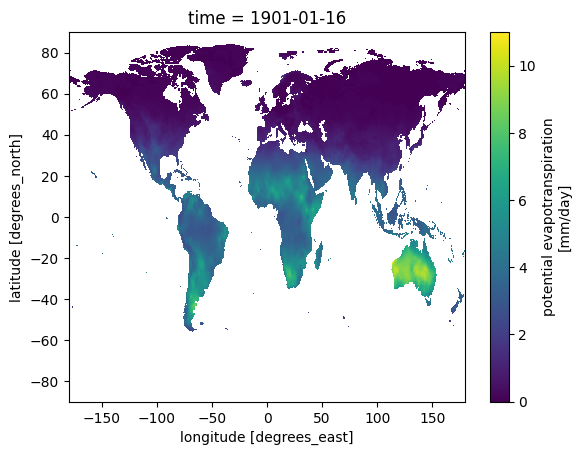

In [6]:
import matplotlib.pyplot as plt
pet["pet"][0,:,:].plot()

array(['1901-01', '1901-02', '1901-03', ..., '2021-10', '2021-11',
       '2021-12'], dtype='datetime64[M]')

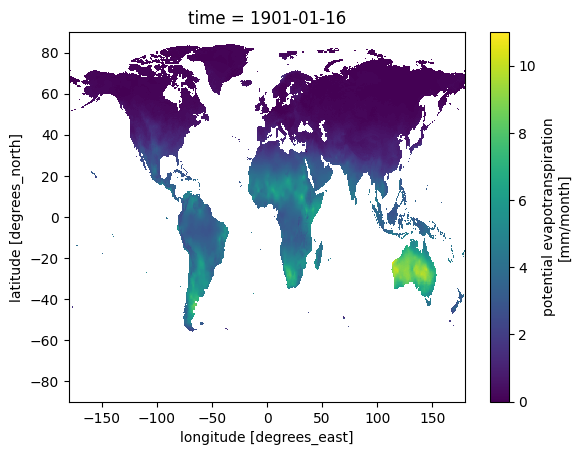

In [28]:
import xarray as xr
pet["pet"][0,:,:].plot()

In [47]:
import xarray as xr
import numpy as np

pet = xr.open_dataset('cru_ts4.06.1901.2021.pet.dat.nc')
days_in_month = np.array(list(map(int, pet.time.dt.days_in_month)))
for i in range(len(pet.time)):
    pet["pet"][i] = pet["pet"][i] * days_in_month[i]
pet["pet"].attrs["units"] = "mm/month"

# save to netcdf
pet.to_netcdf("mo2_cru_ts4.06.1901.2021.pet.dat.nc")

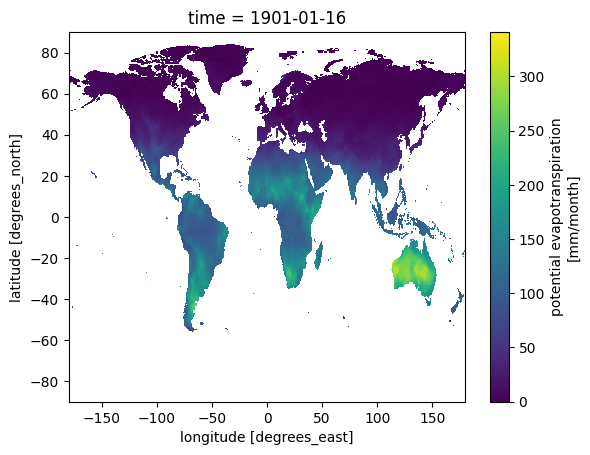

In [48]:
pet3 = xr.open_dataset('mo2_cru_ts4.06.1901.2021.pet.dat.nc')
pet3["pet"][0,:,:].plot()